In [1]:
# All Imports:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# read the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')

print('Data info:')
df.info()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  fl

In [3]:
# Now, we're supposed to have less than 10,000 observations total. To decide what to use between random sampling 
# and stratified sampling, running this code to see if the target variable (Diabetes_012) is imbalanced

In [4]:
# Check class distribution
print(df['Diabetes_012'].value_counts(normalize=True))  # Shows %
print(df['Diabetes_012'].value_counts())  # Shows nos.


0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64
0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


In [5]:
# Sample 3333 rows from each class to balance the dataset
df = pd.concat([
    df[df['Diabetes_012'] == 0].sample(3333, random_state=42),
    df[df['Diabetes_012'] == 1].sample(3333, random_state=42),
    df[df['Diabetes_012'] == 2].sample(3333, random_state=42)
])

# Shuffle and reset index
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Confirm the class distribution
print(df['Diabetes_012'].value_counts())
print(df['Diabetes_012'].value_counts(normalize=True))


1.0    3333
2.0    3333
0.0    3333
Name: Diabetes_012, dtype: int64
1.0    0.333333
2.0    0.333333
0.0    0.333333
Name: Diabetes_012, dtype: float64


### Converting variables to suitable data types for future ML modeling:

#### 1. All the columns except for BMI, MentHlth, and PhysHlth made most sense to be categories. BMI is a continuous variable and MentlHlth and PhysHlth are discrete variables.

In [6]:
# identify variable types
categorical_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
                    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                    'NoDocbcCost', 'GenHlth',
                    'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
discrete_cols = ['MentHlth', 'PhysHlth']
continuous_cols = ['BMI']

# convert data types
for col in categorical_cols:
    df[col] = df[col].astype('int64').astype('category')

for col in discrete_cols:
    df[col] = df[col].astype('int64')

# print the new info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_012          9999 non-null   category
 1   HighBP                9999 non-null   category
 2   HighChol              9999 non-null   category
 3   CholCheck             9999 non-null   category
 4   BMI                   9999 non-null   float64 
 5   Smoker                9999 non-null   category
 6   Stroke                9999 non-null   category
 7   HeartDiseaseorAttack  9999 non-null   category
 8   PhysActivity          9999 non-null   category
 9   Fruits                9999 non-null   category
 10  Veggies               9999 non-null   category
 11  HvyAlcoholConsump     9999 non-null   category
 12  AnyHealthcare         9999 non-null   category
 13  NoDocbcCost           9999 non-null   category
 14  GenHlth               9999 non-null   category
 15  Ment

#### We know that there are no missing values since all columns have all 252680 values. However, we have to check for invalid data:

In [7]:
# check for invalid data

# Diabetes_012 should only be 0, 1, or 2
print('Diabetes_012 value counts:', df.value_counts('Diabetes_012'))

# HighBP should be 0 or 1
print('HighBP value counts:', df.value_counts('HighBP'))

# HighChol should be 0 or 1
print('HighChol value counts:', df.value_counts('HighChol'))

# CholCheck should be 0 or 1
print('CholCheck value counts:', df.value_counts('CholCheck'))

# BMI should be greater than 0
print('invalid BMI:', df[df['BMI'] <= 0].shape[0])

# Smoker should be 0 or 1
print('Smoker value counts:', df.value_counts('Smoker'))

# Stroke should be 0 or 1
print('Stroke value counts:', df.value_counts('Stroke'))

# HeartDiseaseorAttack should be 0 or 1
print('HeartDiseaseorAttack value counts:', df.value_counts('HeartDiseaseorAttack'))

# PhysActivity should be 0 or 1
print('PhysActivity value counts:', df.value_counts('PhysActivity'))

# Fruits should be 0 or 1
print('Fruits value counts:', df.value_counts('Fruits'))

# Veggies should be 0 or 1
print('Veggies value counts:', df.value_counts('Veggies'))

# HvyAlcoholConsump should be 0 or 1
print('HvyAlcoholConsump value counts:', df.value_counts('HvyAlcoholConsump'))

# AnyHealthcare should be 0 or 1
print('AnyHealthcare value counts:', df.value_counts('AnyHealthcare'))

# NoDocbcCost should be 0 or 1
print('NoDocbcCost value counts:', df.value_counts('NoDocbcCost'))

# GenHlth values should be in the range [1, 5] inclusive
print('GenHlth value counts:', df.value_counts('GenHlth'))

# MentHlth should be in the range [0, 30] invlusive since it represents the
# number of days from 0-30
print('invalid MentHlth:', df[(df['MentHlth'] < 0) | (df['MentHlth'] > 30)].shape[0])

# PhysHlth should be in the range [0, 30] invlusive since it represents the
# number of days from 0-30
print('invalid PhysHlth:', df[(df['PhysHlth'] < 0) | (df['PhysHlth'] > 30)].shape[0])

# DiffWalk should be 0 or 1
print('DiffWalk value counts:', df.value_counts('DiffWalk'))

# Sex should be 0 or 1
print('Sex value counts:', df.value_counts('Sex'))

# Age values should be in the range [1, 13] inclusive since it is a 13 level
# category
print('Age value counts:', df.value_counts('Age'))

# Education values should be in the range [1, 6] inclusive since it is
# represented on a scale of 1-6
print('Education value counts:', df.value_counts('Education'))

# Income values should be in the range [1, 8] inclusive since it is represented
# on a scale of 1-8
print('Income value counts:', df.value_counts('Income'))

Diabetes_012 value counts: Diabetes_012
0    3333
1    3333
2    3333
dtype: int64
HighBP value counts: HighBP
1    5811
0    4188
dtype: int64
HighChol value counts: HighChol
1    5635
0    4364
dtype: int64
CholCheck value counts: CholCheck
1    9810
0     189
dtype: int64
invalid BMI: 0
Smoker value counts: Smoker
0    5245
1    4754
dtype: int64
Stroke value counts: Stroke
0    9383
1     616
dtype: int64
HeartDiseaseorAttack value counts: HeartDiseaseorAttack
0    8489
1    1510
dtype: int64
PhysActivity value counts: PhysActivity
1    6986
0    3013
dtype: int64
Fruits value counts: Fruits
1    6162
0    3837
dtype: int64
Veggies value counts: Veggies
1    7907
0    2092
dtype: int64
HvyAlcoholConsump value counts: HvyAlcoholConsump
0    9574
1     425
dtype: int64
AnyHealthcare value counts: AnyHealthcare
1    9530
0     469
dtype: int64
NoDocbcCost value counts: NoDocbcCost
0    8979
1    1020
dtype: int64
GenHlth value counts: GenHlth
3    3423
2    2793
4    2004
1     979
5 

#### There is no invalid data. Next we can check for outliers in our continuous columns (eg BMI) using the Interquartile Range method.

In [8]:
# handle outliers for continuous variables using IQR method
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # clip values to bounds
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [9]:
# Display summary statistics for categorical variables
print("Summary statistics for categorical variables")
df[categorical_cols].describe()

Summary statistics for categorical variables


,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
count,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999
unique,3,2,2,2,2,2,2,2,2,2,2,2,2,5,2,2,13,6,8
top,0,1,1,1,0,0,0,1,1,1,0,1,0,3,0,0,10,6,8
freq,3333,5811,5635,9810,5245,9383,8489,6986,6162,7907,9574,9530,8979,3423,7382,5512,1496,3540,2719


In [10]:
# Display summary statistics for continuous variables
print("Summary statistics for continuous and discrete variables")
df[continuous_cols+discrete_cols].describe().round(2)

Summary statistics for continuous and discrete variables


,BMI,MentHlth,PhysHlth
count,9999.00,9999.00,9999.00
mean,29.83,3.89,6.01
std,6.21,8.26,10.20
min,14.00,0.00,0.00
25%,25.00,0.00,0.00
50%,29.00,0.00,0.00
75%,33.00,3.00,7.00
max,45.00,30.00,30.00


## Feature Importance:

In [11]:
# Target and feature columns
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

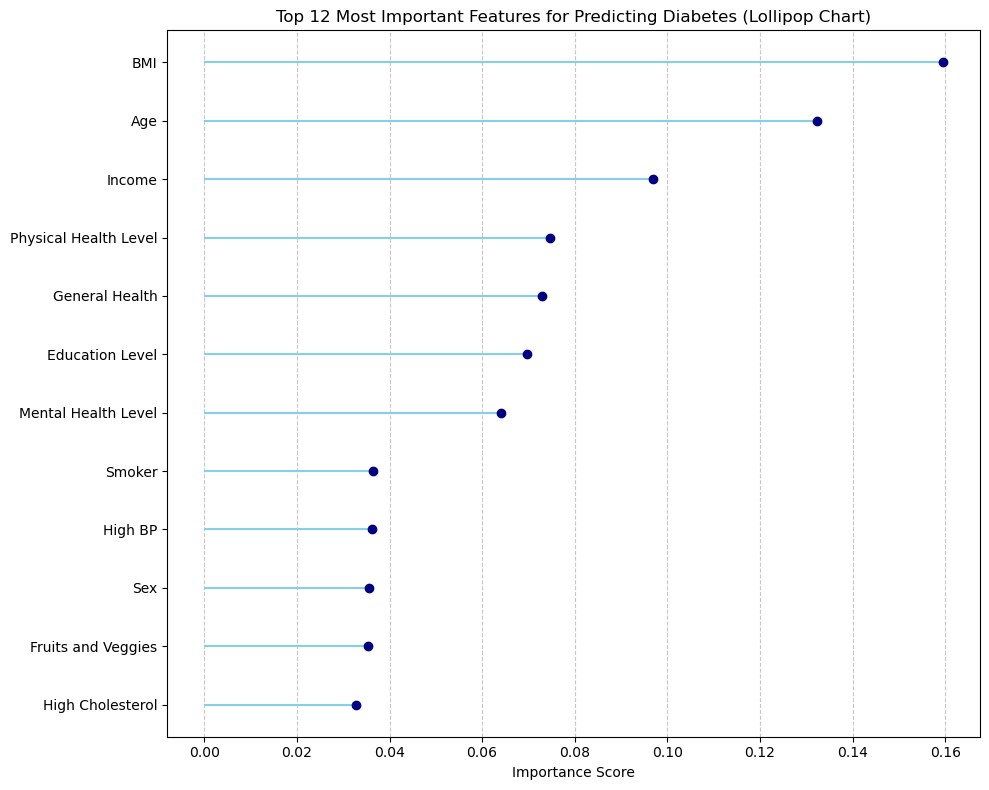

In [13]:
# Create Series of feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Get the top 12 most important features
top_features = importances.sort_values(ascending=False).head(12)

# Replace column names with readable labels
label_mapping = {
    'BMI': 'BMI',
    'Age': 'Age',
    'Sex': 'Sex',
    'HighChol': 'High Cholesterol',
    'HighBP': 'High BP',
    'GenHlth': 'General Health',
    'Smoker': 'Smoker',
    'PhysHlth': 'Physical Health Level',
    'Fruits': 'Fruits and Veggies',
    'Income': 'Income',
    'MentHlth': 'Mental Health Level',
    'Education': 'Education Level'
}
top_features.index = top_features.index.map(label_mapping)

# Reverse for top-down readability
top_features = top_features[::-1]

# Plot Lollipop Chart
plt.figure(figsize=(10, 8))
plt.hlines(y=range(len(top_features)), xmin=0, xmax=top_features.values, color='skyblue')
plt.plot(top_features.values, range(len(top_features)), "o", color="navy")
plt.yticks(ticks=range(len(top_features)), labels=top_features.index)
plt.xlabel("Importance Score")
plt.title("Top 12 Most Important Features for Predicting Diabetes (Lollipop Chart)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1000
           1       0.41      0.37      0.39      1000
           2       0.49      0.57      0.53      1000

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

